# <center>CUSTOMER PERSONALITY ANALYSIS

## ABOUT THE DATASET


ID: Customer's unique identifier.

Year_Birth: Customer's birth year.

Education: Customer's education level.

Marital_Status: Customer's marital status.

Income: Customer's yearly household income.

Kidhome: Number of children in customer's household.

Teenhome: Number of teenagers in customer's household.

Dt_Customer: Date of customer's enrollment with the company.

Recency: Number of days since customer's last purchase.

Complain: 1 if customer complained in the last 2 years, 0 otherwise.MntWines: Amount spent on wine in last 2 years.

MntFruits: Amount spent on fruits in last 2 years.

MntMeatProducts: Amount spent on meat in last 2 years.

MntFishProducts: Amount spent on fish in last 2 years.

MntSweetProducts: Amount spent on sweets in last 2 years.

MntGoldProds: Amount spent on gold in last 2 years.    

NumDealsPurchases: Number of purchases made with a discount.

NumWebPurchases: Number of purchases made through the company’s web site.

NumCatalogPurchases: Number of purchases made using a catalogue.

NumStorePurchases: Number of purchases made directly in stores.

NumWebVisitsMonth: Number of visits to company’s web site in the last month.

AcceptedCmp1: 1 if customer accepted the offer in the 1st campaign, 0 otherwise.

AcceptedCmp2: 1 if customer accepted the offer in the 2nd campaign, 0 otherwise.

AcceptedCmp3: 1 if customer accepted the offer in the 3rd campaign, 0 otherwise.

AcceptedCmp4: 1 if customer accepted the offer in the 4th campaign, 0 otherwise.

AcceptedCmp5: 1 if customer accepted the offer in the 5th campaign, 0 otherwise.

Response: 1 if customer accepted the offer in the last campaign, 0 otherwise



In [56]:
#importing the libraries
import numpy as np 
import pandas as pd 
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns
import matplotlib
from datetime import date
import warnings
warnings.filterwarnings("ignore")
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
pd.set_option("display.max_columns",None)
pd.set_option("display.max_rows",None)

In [57]:
#reading the dataset
df=pd.read_csv("C:\\Users\\HP\\Downloads\\marketing_campaign.csv",sep="\t")
df

ID  Year_Birth   Education Marital_Status    Income  Kidhome  \
0      5524        1957  Graduation         Single   58138.0        0   
1      2174        1954  Graduation         Single   46344.0        1   
2      4141        1965  Graduation       Together   71613.0        0   
3      6182        1984  Graduation       Together   26646.0        1   
4      5324        1981         PhD        Married   58293.0        1   
5      7446        1967      Master       Together   62513.0        0   
6       965        1971  Graduation       Divorced   55635.0        0   
7      6177        1985         PhD        Married   33454.0        1   
8      4855        1974         PhD       Together   30351.0        1   
9      5899        1950         PhD       Together    5648.0        1   
10     1994        1983  Graduation        Married       NaN        1   
11      387        1976       Basic        Married    7500.0        0   
12     2125        1959  Graduation       Divorced   63033.0        0   
13     8180        1952      Master       Divorced   59354.0        1   
14     2569        1987  Graduation        Married   17323.0        0   
15     2114        1946         PhD         Single   82800.0        0   
16     9736        1980  Graduation        Married   41850.0        1   
17     4939        1946  Graduation       Together   37760.0        0   
18     6565        1949      Master        Married   76995.0        0   
19     2278        1985    2n Cycle         Single   33812.0        1   
20     9360        1982  Graduation        Married   37040.0        0   
21     5376        1979  Graduation        Married    2447.0        1   
22     1993        1949         PhD        Married   58607.0        0   
23     4047        1954         PhD        Married   65324.0        0   
24     1409        1951  Graduation       Together   40689.0        0   
25     7892        1969  Graduation         Single   18589.0        0   
26     2404        1976  Graduation        Married   53359.0        1   
27     5255        1986  Graduation         Single       NaN        1   
28     9422        1989  Graduation        Married   38360.0        1   
29     1966        1965         PhD        Married   84618.0        0   
30     6864        1989      Master       Divorced   10979.0        0   
31     3033        1963      Master       Together   38620.0        0   
32     5710        1970  Graduation       Together   40548.0        0   
33     7373        1952         PhD       Divorced   46610.0        0   
34     8755        1946      Master        Married   68657.0        0   
35    10738        1951      Master         Single   49389.0        1   
36     4339        1970         PhD        Married   67353.0        0   
37    10755        1976    2n Cycle        Married   23718.0        1   
38     8595        1973  Graduation          Widow   42429.0        0   
39     2968        1943         PhD       Divorced   48948.0        0   
40     8601        1980  Graduation        Married   80011.0        0   
41      503        1985      Master        Married   20559.0        1   
42     8430        1957  Graduation       Together   21994.0        0   
43     7281        1959         PhD         Single       NaN        0   
44     2139        1975      Master        Married    7500.0        1   
45     1371        1976  Graduation         Single   79941.0        0   
46     9909        1996    2n Cycle        Married    7500.0        0   
47     7286        1968  Graduation       Together   41728.0        1   
48     7244        1951  Graduation         Single       NaN        2   
49     6566        1954         PhD        Married   72550.0        1   
50     8614        1957  Graduation          Widow   65486.0        0   
51     4114        1964      Master        Married   79143.0        0   
52     1331        1977  Graduation         Single   35790.0        1   
53     2225        1977  Graduation       Divorced   82582.0       

In [58]:
df.head()

ID  Year_Birth   Education Marital_Status   Income  Kidhome  Teenhome  \
0  5524        1957  Graduation         Single  58138.0        0         0   
1  2174        1954  Graduation         Single  46344.0        1         1   
2  4141        1965  Graduation       Together  71613.0        0         0   
3  6182        1984  Graduation       Together  26646.0        1         0   
4  5324        1981         PhD        Married  58293.0        1         0   

  Dt_Customer  Recency  MntWines  MntFruits  MntMeatProducts  MntFishProducts  \
0  04-09-2012       58       635         88              546              172   
1  08-03-2014       38        11          1                6                2   
2  21-08-2013       26       426         49              127              111   
3  10-02-2014       26        11          4               20               10   
4  19-01-2014       94       173         43              118               46   

   MntSweetProducts  MntGoldProds  NumDealsPurchases  NumWebPurchases  \
0                88            88                  3                8   
1                 1             6                  2                1   
2                21            42                  1                8   
3                 3             5                  2                2   
4                27            15                  5                5   

   NumCatalogPurchases  NumStorePurchases  NumWebVisitsMonth  AcceptedCmp3  \
0                   10                  4                  7             0   
1                    1                  2                  5             0   
2                    2                 10                  4             0   
3                    0                  4                  6             0   
4                    3                  6                  5             0   

   AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  \
0             0             0             0             0         0   
1             0             0             0             0         0   
2             0             0             0             0         0   
3             0             0             0             0         0   
4             0             0             0             0         0   

   Z_CostContact  Z_Revenue  Response  
0              3         11         1  
1              3         11         0  
2              3         11         0  
3              3         11         0  
4              3         11         0

In [59]:
df.shape

(2240, 29)

In [60]:
df.size

64960

In [61]:
df.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response'],
      dtype='object')

In [62]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [63]:
df.describe()

ID   Year_Birth         Income      Kidhome     Teenhome  \
count   2240.000000  2240.000000    2216.000000  2240.000000  2240.000000   
mean    5592.159821  1968.805804   52247.251354     0.444196     0.506250   
std     3246.662198    11.984069   25173.076661     0.538398     0.544538   
min        0.000000  1893.000000    1730.000000     0.000000     0.000000   
25%     2828.250000  1959.000000   35303.000000     0.000000     0.000000   
50%     5458.500000  1970.000000   51381.500000     0.000000     0.000000   
75%     8427.750000  1977.000000   68522.000000     1.000000     1.000000   
max    11191.000000  1996.000000  666666.000000     2.000000     2.000000   

           Recency     MntWines    MntFruits  MntMeatProducts  \
count  2240.000000  2240.000000  2240.000000      2240.000000   
mean     49.109375   303.935714    26.302232       166.950000   
std      28.962453   336.597393    39.773434       225.715373   
min       0.000000     0.000000     0.000000         0.000000   
25%      24.000000    23.750000     1.000000        16.000000   
50%      49.000000   173.500000     8.000000        67.000000   
75%      74.000000   504.250000    33.000000       232.000000   
max      99.000000  1493.000000   199.000000      1725.000000   

       MntFishProducts  MntSweetProducts  MntGoldProds  NumDealsPurchases  \
count      2240.000000       2240.000000   2240.000000        2240.000000   
mean         37.525446         27.062946     44.021875           2.325000   
std          54.628979         41.280498     52.167439           1.932238   
min           0.000000          0.000000      0.000000           0.000000   
25%           3.000000          1.000000      9.000000           1.000000   
50%          12.000000          8.000000     24.000000           2.000000   
75%          50.000000         33.000000     56.000000           3.000000   
max         259.000000        263.000000    362.000000          15.000000   

       NumWebPurchases  NumCatalogPurchases  NumStorePurchases  \
count      2240.000000          2240.000000        2240.000000   
mean          4.084821             2.662054           5.790179   
std           2.778714             2.923101           3.250958   
min           0.000000             0.000000           0.000000   
25%           2.000000             0.000000           3.000000   
50%           4.000000             2.000000           5.000000   
75%           6.000000             4.000000           8.000000   
max          27.000000            28.000000          13.000000   

       NumWebVisitsMonth  AcceptedCmp3  AcceptedCmp4  AcceptedCmp5  \
count        2240.000000   2240.000000   2240.000000   2240.000000   
mean            5.316518      0.072768      0.074554      0.072768   
std             2.426645      0.259813      0.262728      0.259813   
min             0.000000      0.000000      0.000000      0.000000   
25%             3.000000      0.000000      0.000000      0.000000   
50%             6.000000      0.000000      0.000000      0.000000   
75%             7.000000      0.000000      0.000000      0.000000   
max            20.000000      1.000000      1.000000      1.000000   

       AcceptedCmp1  AcceptedCmp2     Complain  Z_CostContact  Z_Revenue  \
count   2240.000000   2240.000000  2240.000000         2240.0     2240.0   
mean       0.064286      0.013393     0.009375            3.0       11.0   
std        0.245316      0.114976     0.096391            0.0        0.0   
min        0.000000      0.000000     0.000000            3.0       11.0   
25%        0.000000      0.000000     0.000000            3.0       11.0   
50%        0.000000      0.000000     0.000000            3.0       11.0   
75%        0.000000      0.000000     0.000000            3.0       11.0   
max        1.000000      1.000000     1.000000            3.0       11.0   

          Response  
count  2240.000000  
mean      0.149107  
std       0.356274  
min       0.000000  
25%       0.000000  
50%   

In [64]:
df.isnull().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

In [65]:
#filling the null values of income with its mean value
df.fillna(df["Income"].mean(),inplace=True)

In [66]:
df.isnull().sum()

ID                     0
Year_Birth             0
Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Dt_Customer            0
Recency                0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
AcceptedCmp3           0
AcceptedCmp4           0
AcceptedCmp5           0
AcceptedCmp1           0
AcceptedCmp2           0
Complain               0
Z_CostContact          0
Z_Revenue              0
Response               0
dtype: int64

In [67]:
#checking for duplicated  values
df[df.duplicated()]

Empty DataFrame
Columns: [ID, Year_Birth, Education, Marital_Status, Income, Kidhome, Teenhome, Dt_Customer, Recency, MntWines, MntFruits, MntMeatProducts, MntFishProducts, MntSweetProducts, MntGoldProds, NumDealsPurchases, NumWebPurchases, NumCatalogPurchases, NumStorePurchases, NumWebVisitsMonth, AcceptedCmp3, AcceptedCmp4, AcceptedCmp5, AcceptedCmp1, AcceptedCmp2, Complain, Z_CostContact, Z_Revenue, Response]
Index: []

In [13]:
df.nunique()

ID                     2240
Year_Birth               59
Education                 5
Marital_Status            8
Income                 1975
Kidhome                   3
Teenhome                  3
Dt_Customer             663
Recency                 100
MntWines                776
MntFruits               158
MntMeatProducts         558
MntFishProducts         182
MntSweetProducts        177
MntGoldProds            213
NumDealsPurchases        15
NumWebPurchases          15
NumCatalogPurchases      14
NumStorePurchases        14
NumWebVisitsMonth        16
AcceptedCmp3              2
AcceptedCmp4              2
AcceptedCmp5              2
AcceptedCmp1              2
AcceptedCmp2              2
Complain                  2
Z_CostContact             1
Z_Revenue                 1
Response                  2
dtype: int64

In [14]:
#droping the unnecessary columns
df.drop(columns=["Z_CostContact", "Z_Revenue"],inplace=True)

## Univariate Analysis

In [15]:
df['Education'].unique()

array(['Graduation', 'PhD', 'Master', 'Basic', '2n Cycle'], dtype=object)

In [16]:
#replacing the education values into ug and pg
df['Education'] = df['Education'].replace(['PhD','2n Cycle','Graduation', 'Master'],'Post Graduate')  
df['Education'] = df['Education'].replace(['Basic'], 'Under Graduate')

In [17]:
df['Education'].unique()

array(['Post Graduate', 'Under Graduate'], dtype=object)

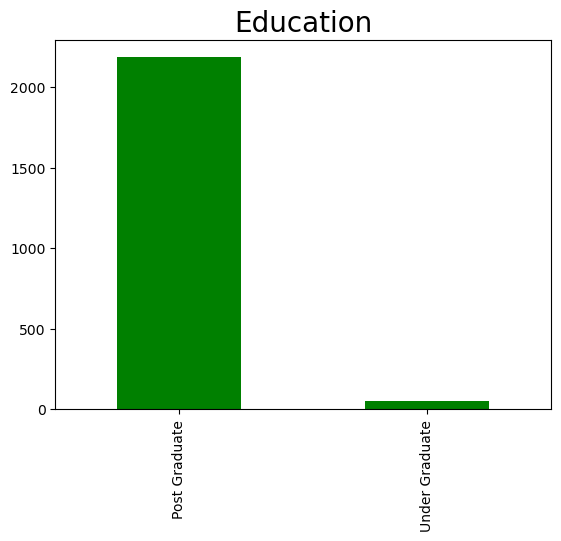

<Figure size 800x800 with 0 Axes>

In [18]:
df['Education'].value_counts().plot(kind='bar',color = 'green',linewidth = 3)
plt.title("Education",fontsize=20)
plt.figure(figsize=(8,8))
plt.show()

### 97.58% of Customers in the dataset are Post Graduate
### 2.42% of Customers in the dataset are Under Graduate

In [19]:
df['Marital_Status'].unique()

array(['Single', 'Together', 'Married', 'Divorced', 'Widow', 'Alone',
       'Absurd', 'YOLO'], dtype=object)

In [20]:
#changing the marital_status values into relationship and single
df['Marital_Status'] = df['Marital_Status'].replace(['Married', 'Together'],'Relationship')
df['Marital_Status'] = df['Marital_Status'].replace(['Divorced', 'Widow', 'Alone', 'YOLO', 'Absurd'],'Single')

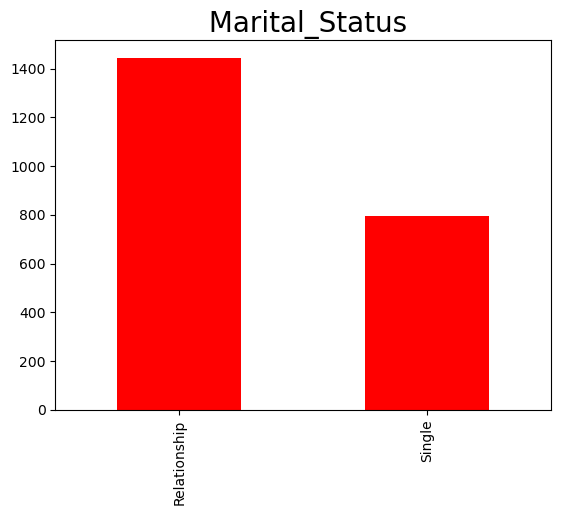

<Figure size 800x800 with 0 Axes>

In [21]:
df['Marital_Status'].value_counts().plot(kind='bar',color = 'red',linewidth = 3)
plt.title(" Marital_Status",fontsize=20)
plt.figure(figsize=(8,8))
plt.show()

### 64.46% of Customers in the dataset are in Relationship
### 35.53% of Customers in the dataset are Single

In [22]:
#AverageIncome
df['Income'].mean()

52247.25135379061

In [23]:
df['Kidhome'].unique()

array([0, 1, 2], dtype=int64)

In [24]:
df['Teenhome'].unique()

array([0, 1, 2], dtype=int64)

In [25]:
# Combining different dataframe into a single column 
df['Kids'] = df['Kidhome'] + df['Teenhome']

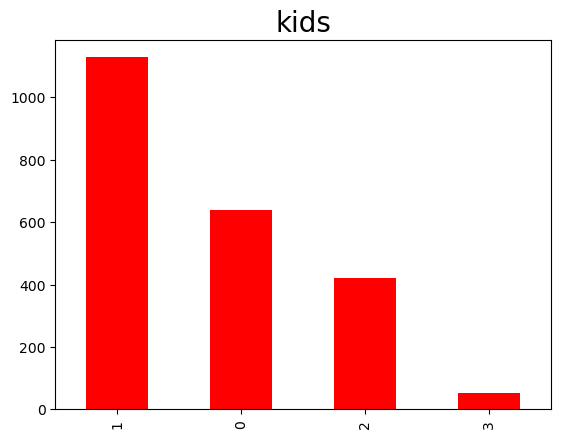

<Figure size 800x800 with 0 Axes>

In [26]:
df['Kids'].value_counts().plot(kind='bar',color = 'red',linewidth = 3)
plt.title("kids",fontsize=20)
plt.figure(figsize=(8,8))
plt.show()

#### 50.35% of Customers in the dataset have 1 kid.
#### 28.48% of Customers in the dataset have no kids.
#### 18.79% of Customers in the dataset have 2 kids.
#### 2.36% of Customers in the dataset have 3 kids.

In [27]:
# Combining different dataframe into a single column
df['Expenses'] = df['MntWines'] + df['MntFruits'] + df['MntMeatProducts'] + df['MntFishProducts'] + df['MntSweetProducts'] + df['MntGoldProds']

In [28]:
df['Expenses'].max()


2525

In [29]:
df['Expenses'].min()

5

In [30]:
df['Expenses'].mean()

605.7982142857143

In [31]:
# Combining different dataframe into a single column
df['TotalAcceptedCmp'] = df['AcceptedCmp1'] + df['AcceptedCmp2'] + df['AcceptedCmp3'] + df['AcceptedCmp4'] + df['AcceptedCmp5']


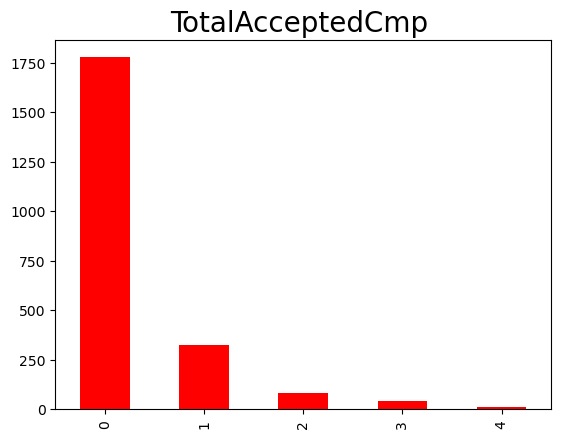

<Figure size 800x800 with 0 Axes>

In [32]:
df['TotalAcceptedCmp'].value_counts().plot(kind='bar',color = 'red',linewidth = 3)
plt.title("TotalAcceptedCmp ",fontsize=20)
plt.figure(figsize=(8,8))
plt.show()

#### 79.33% of Customers accepted the offer in the campaign are "0"
#### 14.50% of Customers accepted the offer in the campaign are "1"
#### 3.70% of Customers accepted the offer in the campaign are "2"
#### 1.96% of Customers accepted the offer in the campaign are "3"
#### 0.49% of Customers accepted the offer in the campaign are "4"

In [33]:
# Combining different dataframe into a single column
df['NumTotalPurchases'] = df['NumWebPurchases'] + df['NumCatalogPurchases'] + df['NumStorePurchases'] + df['NumDealsPurchases']

In [34]:
df['NumTotalPurchases'].min()

0

In [35]:
df['NumTotalPurchases'].max()

44

In [36]:
df['NumTotalPurchases'].mean()

14.862053571428572

In [37]:
#droping the unnecessary columns
df.drop(df[["ID","AcceptedCmp1","AcceptedCmp2","AcceptedCmp3","AcceptedCmp4","AcceptedCmp5","NumWebVisitsMonth","NumWebPurchases","NumCatalogPurchases","NumStorePurchases","NumDealsPurchases","Kidhome","Teenhome","MntWines","MntFruits","MntMeatProducts","MntFishProducts","MntSweetProducts","MntGoldProds","Recency","Complain","Response"]],axis=1,inplace=True)

In [38]:
#NUMBER OF DAYS A CUSTOMER WAS ENGAGED WITH COMPANY df["Day_engaged"]
#CHANGING "Dt_customer" into timestamp format
df['Dt_Customer'] = pd.to_datetime(df.Dt_Customer)
df['First_day'] = '01-01-2015'
df['First_day'] = pd.to_datetime(df.First_day)
df['Day_engaged'] = (df['First_day'] - df['Dt_Customer']).dt.days

In [39]:
#droping the unnecessary columns
df.drop(df[["Dt_Customer","First_day","Year_Birth"]],axis=1,inplace=True)

In [40]:
df.columns

Index(['Education', 'Marital_Status', 'Income', 'Kids', 'Expenses',
       'TotalAcceptedCmp', 'NumTotalPurchases', 'Day_engaged'],
      dtype='object')

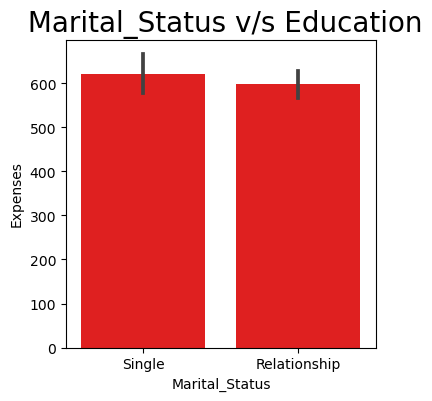

In [41]:
plt.figure(figsize=(4,4))
plt.title(" Marital_Status v/s Education",fontsize=20)
sns.barplot(x="Marital_Status", y="Expenses", data=df,color="red")
plt.show()


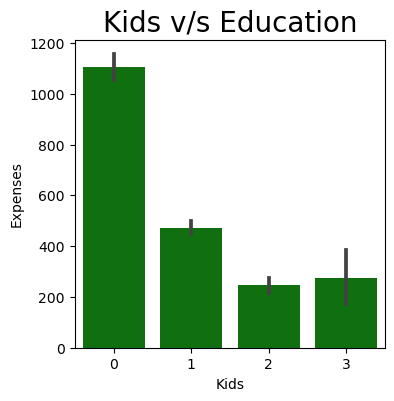

In [42]:
plt.figure(figsize=(4,4))
plt.title("Kids v/s Education",fontsize=20)
sns.barplot(x="Kids", y="Expenses", data=df,color="green")
plt.show()


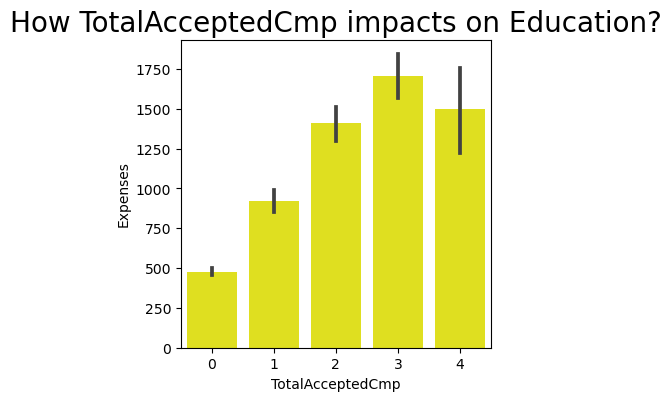

In [43]:
plt.figure(figsize=(4,4))
plt.title("How TotalAcceptedCmp impacts on Education?",fontsize=20)
sns.barplot(x="TotalAcceptedCmp", y="Expenses", data=df,color="yellow")
plt.show()

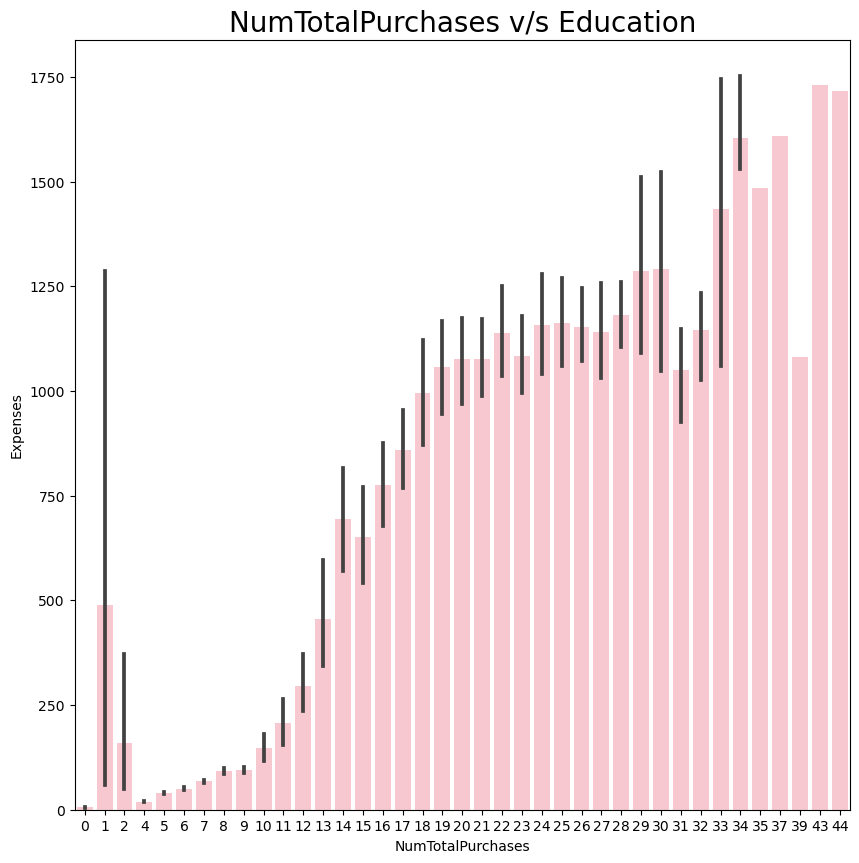

In [44]:
plt.figure(figsize=(10,10))
plt.title("NumTotalPurchases v/s Education",fontsize=20)
sns.barplot(x="NumTotalPurchases", y="Expenses", data=df,color="pink")
plt.show()

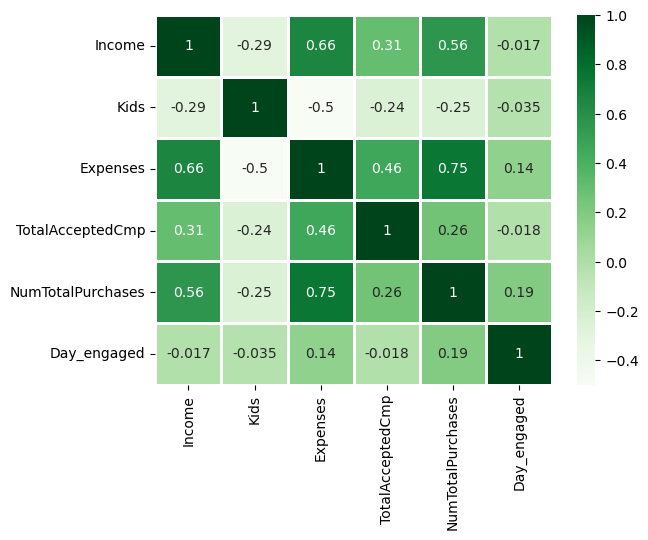

In [45]:
sns.heatmap(df.corr(), annot=True,cmap="Greens",linewidths=1)
plt.show()

In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Education          2240 non-null   object 
 1   Marital_Status     2240 non-null   object 
 2   Income             2240 non-null   float64
 3   Kids               2240 non-null   int64  
 4   Expenses           2240 non-null   int64  
 5   TotalAcceptedCmp   2240 non-null   int64  
 6   NumTotalPurchases  2240 non-null   int64  
 7   Day_engaged        2240 non-null   int64  
dtypes: float64(1), int64(5), object(2)
memory usage: 140.1+ KB


In [47]:
#label enconding 
le=LabelEncoder()
df["Education"]=le.fit_transform(df["Education"])
df["Marital_Status"]=le.fit_transform(df["Marital_Status"])

In [48]:
sc=StandardScaler()

In [49]:
df1=sc.fit_transform(df)
data = pd.DataFrame(df1, index=df.index, columns=df.columns)

In [50]:
data

Education  Marital_Status     Income      Kids  Expenses  \
0     -0.157171        1.346874   0.235327 -1.264505  1.679417   
1     -0.157171        1.346874  -0.235826  1.396361 -0.961275   
2     -0.157171       -0.742460   0.773633 -1.264505  0.282673   
3     -0.157171       -0.742460  -1.022732  0.065928 -0.918094   
4     -0.157171       -0.742460   0.241519  0.065928 -0.305254   
5     -0.157171       -0.742460   0.410102  0.065928  0.183025   
6     -0.157171        1.346874   0.135336  0.065928 -0.026238   
7     -0.157171       -0.742460  -0.750763  0.065928 -0.725440   
8     -0.157171       -0.742460  -0.874723  0.065928 -0.929720   
9     -0.157171       -0.742460  -1.861572  1.396361 -0.924738   
10    -0.157171       -0.742460   0.000000  0.065928 -0.974562   
11     6.362506       -0.742460  -1.787587 -1.264505 -0.904808   
12    -0.157171        1.346874   0.430875 -1.264505  0.824098   
13    -0.157171        1.346874   0.283904  1.396361 -0.491265   
14    -0.157171       -0.742460  -1.395173 -1.264505 -0.929720   
15    -0.157171        1.346874   1.220538 -1.264505  1.177851   
16    -0.157171       -0.742460  -0.415355  1.396361 -0.846679   
17    -0.157171       -0.742460  -0.578744 -1.264505 -0.479640   
18    -0.157171       -0.742460   0.988636  0.065928  1.953451   
19    -0.157171        1.346874  -0.736461  0.065928 -0.785229   
20    -0.157171       -0.742460  -0.607507 -1.264505 -0.481301   
21    -0.157171       -0.742460  -1.989447  0.065928  1.867089   
22    -0.157171       -0.742460   0.254063  0.065928  0.608193   
23    -0.157171       -0.742460   0.522397  0.065928 -0.102635   
24    -0.157171       -0.742460  -0.461735  0.065928 -0.268717   
25    -0.157171        1.346874  -1.344598 -1.264505 -0.881556   
26    -0.157171       -0.742460   0.044413  1.396361 -0.579289   
27    -0.157171        1.346874   0.000000  0.065928  0.051820   
28    -0.157171       -0.742460  -0.554775  0.065928 -0.788551   
29    -0.157171       -0.742460   1.293164 -1.264505  1.770762   
30    -0.157171        1.346874  -1.648606 -1.264505 -0.956293   
31    -0.157171       -0.742460  -0.544389 -1.264505 -0.477979   
32    -0.157171       -0.742460  -0.467368  0.065928 -0.806820   
33    -0.157171        1.346874  -0.225200  1.396361 -0.504552   
34    -0.157171       -0.742460   0.655545 -1.264505  0.980215   
35    -0.157171        1.346874  -0.114183  1.396361 -0.898165   
36    -0.157171       -0.742460   0.603453  0.065928  0.510205   
37    -0.157171       -0.742460  -1.139702  0.065928 -0.871592   
38    -0.157171        1.346874  -0.392225  0.065928 -0.894843   
39    -0.157171        1.346874  -0.131800 -1.264505  0.491936   
40    -0.157171       -0.742460   1.109121  0.065928  1.310716   
41    -0.157171       -0.742460  -1.265899  0.065928 -0.918094   
42    -0.157171       -0.742460  -1.208573  0.065928 -0.969580   
43    -0.157171        1.346874   0.000000 -1.264505 -0.697206   
44    -0.157171       -0.742460  -1.787587  0.065928 -0.954632   
45    -0.157171        1.346874   1.106325 -1.264505  0.628122   
46    -0.157171       -0.742460  -1.787587 -1.264505 -0.803498   
47    -0.157171       -0.742460  -0.420229  0.065928 -0.914773   
48    -0.157171        1.346874   0.000000  2.726794 -0.800177   
49    -0.157171       -0.742460   0.811065  1.396361  1.184495   
50    -0.157171        1.346874   0.528869  0.065928 -0.164085   
51    -0.157171       -0.742460   1.074446 -1.264505  1.805639   
52    -0.157171        1.346874  -0.657443  0.065928 -0.886539   
53    -0.157171        1.346874   1.211829 -1.264505  1.679417   
54    -0.157171       -0.742460   0.564303  1.396361  0.000335   
55    -0.157171       -0.742460   1.203919 -1.264505  2.244093   
56    -0.157171        1.346874   0.720662 -1.264505  0.809151   
57    -0.157171        1.346874  -0.971119  0.065928 -0.957954   
58    -0.157171        1.346874   0.000000  0.065928 -0.929720   
59    -0.157171       -0.742460   0.148079  0.

In [51]:
x=data[["Income","Expenses"]].values
x

array([[ 0.23532677,  1.67941681],
       [-0.23582624, -0.96127545],
       [ 0.77363327,  0.28267329],
       ...,
       [ 0.18910632,  1.05495122],
       [ 0.67903514,  0.39394775],
       [ 0.02483795, -0.7204576 ]])

In [52]:
x

array([[ 0.23532677,  1.67941681],
       [-0.23582624, -0.96127545],
       [ 0.77363327,  0.28267329],
       ...,
       [ 0.18910632,  1.05495122],
       [ 0.67903514,  0.39394775],
       [ 0.02483795, -0.7204576 ]])

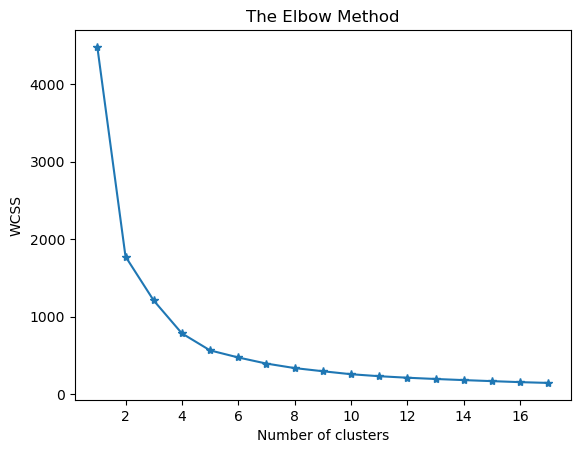

In [53]:
# Using the elbow method to find the optimal number of clusters
wcss = []
for i in range(1, 18):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 50)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 18), wcss, marker='*')
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [54]:
# Fitting K-Means to the dataset
kmeans=KMeans(n_clusters=2,init ='k-means++',random_state=50)
y_kmeans=kmeans.fit_predict(x)

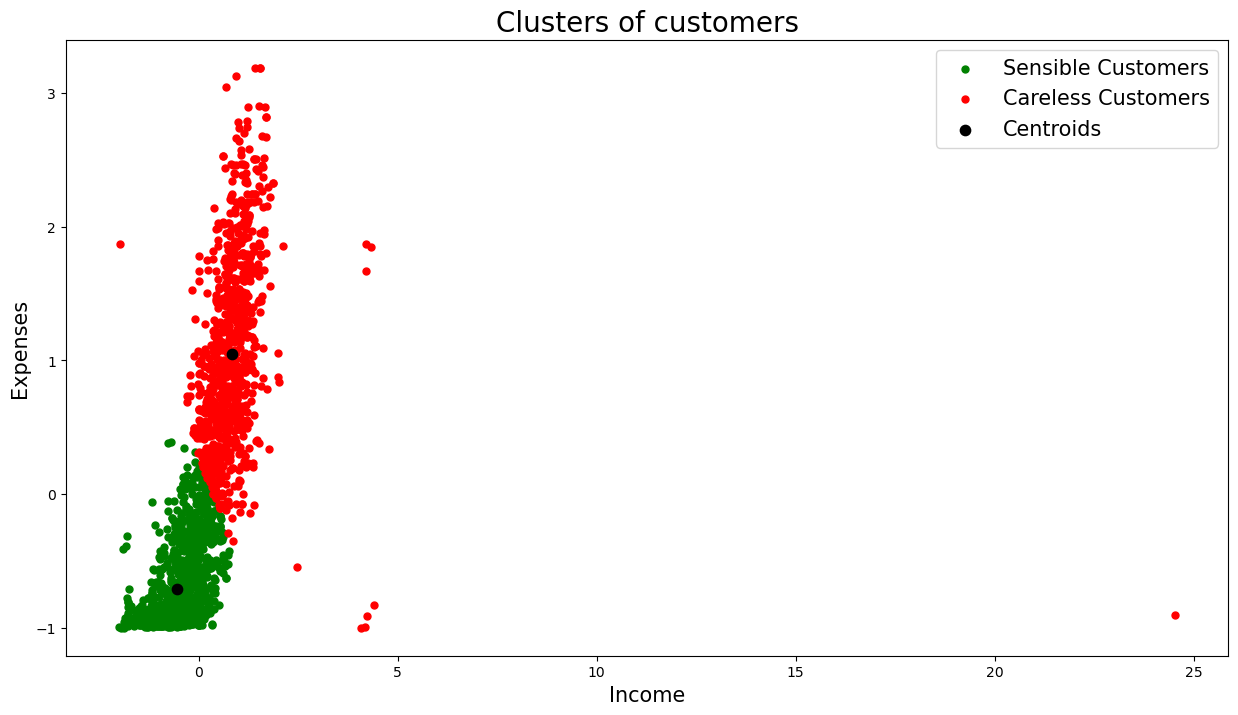

In [68]:
# Visualising the clusters
plt.figure(figsize= (15,8))
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], s = 25, c = 'green', label = 'Sensible Customers')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], s = 25, c = 'red', label = 'Careless Customers')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 55, c = 'black', label = 'Centroids')
plt.title('Clusters of customers',fontsize = 20)
plt.xlabel('Income',fontsize = 15)
plt.ylabel('Expenses',fontsize = 15)
plt.legend(fontsize = 15)
plt.show()

### Customer who has Low income and Low Expenses are Sensible customers
### Customer who has Low income and High Expenses are Careless customers